# dbのデータを可視化

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(r'C:\Users\yamaguchi\MyDocument\pytest\virtual_currency\gmo\original_gym\myenv\2023-09-20_ratest_rate.db')
df = pd.read_sql('SELECT * FROM ratest_rate', conn)
df.head()

,id,timestamp,channel,ask,bid,high,last,low,symbol,column
0,1,2023-09-20 00:20:11.931000,ticker,4021627,4020401,4053439,4020401,3949961,BTC,146.6095
1,2,2023-09-20 00:20:51.559000,ticker,4026629,4023899,4053439,4023900,3949961,BTC,146.6461
2,3,2023-09-20 00:21:09.531000,ticker,4026532,4024850,4053439,4026532,3949961,BTC,146.6661
3,4,2023-09-20 00:21:41.111000,ticker,4026629,4025050,4053439,4026629,3949961,BTC,146.6663
4,5,2023-09-20 00:23:11.378000,ticker,4026628,4025100,4053439,4026628,3949961,BTC,146.5873


In [3]:
df = df.drop(['id', 'symbol', 'channel'], axis = 1)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

df.head()

,timestamp,ask,bid,high,last,low,column
0,2023-09-20 00:20:11.931,4021627,4020401,4053439,4020401,3949961,146.6095
1,2023-09-20 00:20:51.559,4026629,4023899,4053439,4023900,3949961,146.6461
2,2023-09-20 00:21:09.531,4026532,4024850,4053439,4026532,3949961,146.6661
3,2023-09-20 00:21:41.111,4026629,4025050,4053439,4026629,3949961,146.6663
4,2023-09-20 00:23:11.378,4026628,4025100,4053439,4026628,3949961,146.5873


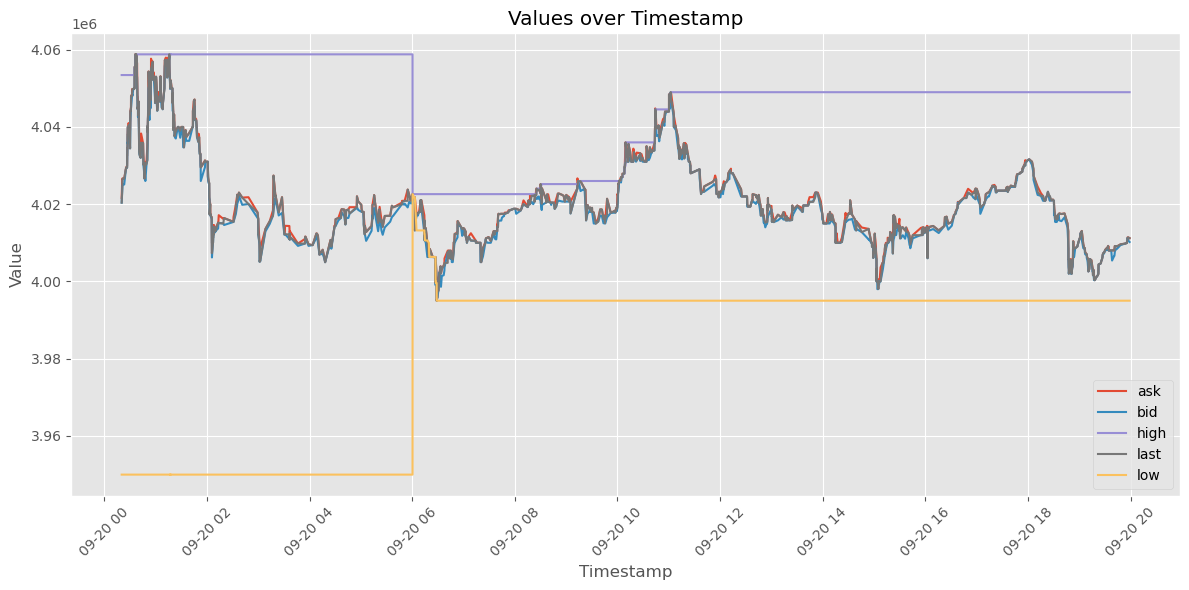

In [4]:
import matplotlib.pyplot as plt

# Set the style and size of the plot
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')

# Plot the columns against timestamp
for column in ['ask', 'bid', 'high', 'last', 'low']:
    plt.plot(df['timestamp'], df[column], label=column)

# Setting labels, title and legend
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Values over Timestamp')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


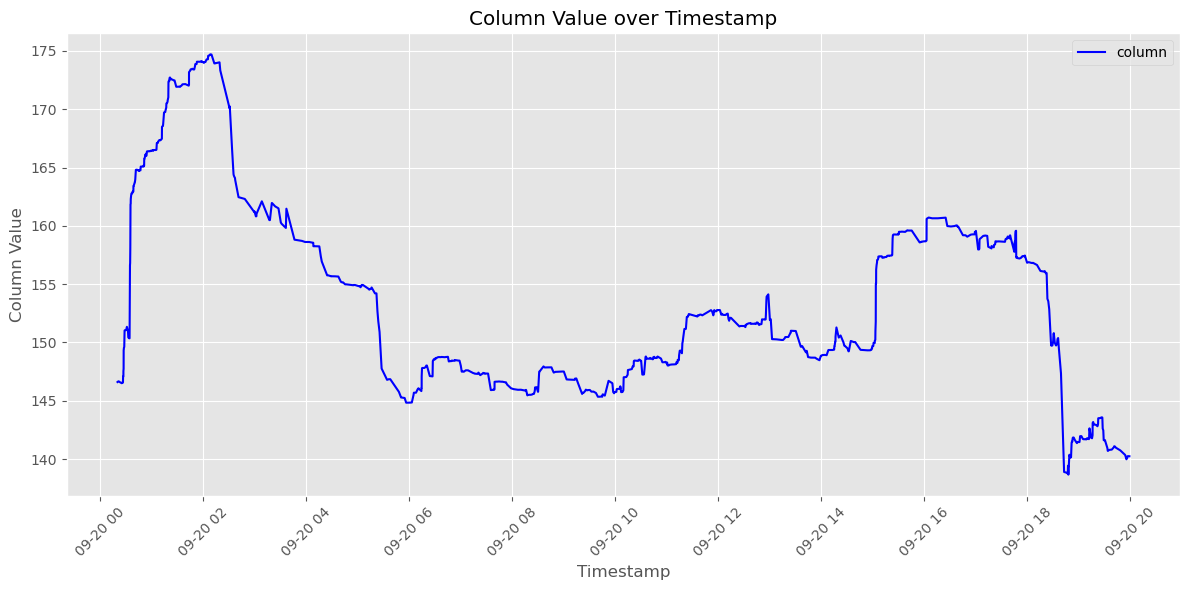

In [5]:
# Set the style and size of the plot
plt.figure(figsize=(12, 6))

# Plot the 'column' against timestamp
plt.plot(df['timestamp'], df['column'], label='column', color='blue')

# Setting labels, title and legend
plt.xlabel('Timestamp')
plt.ylabel('Column Value')
plt.title('Column Value over Timestamp')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


## ここまでの流れをまとめる

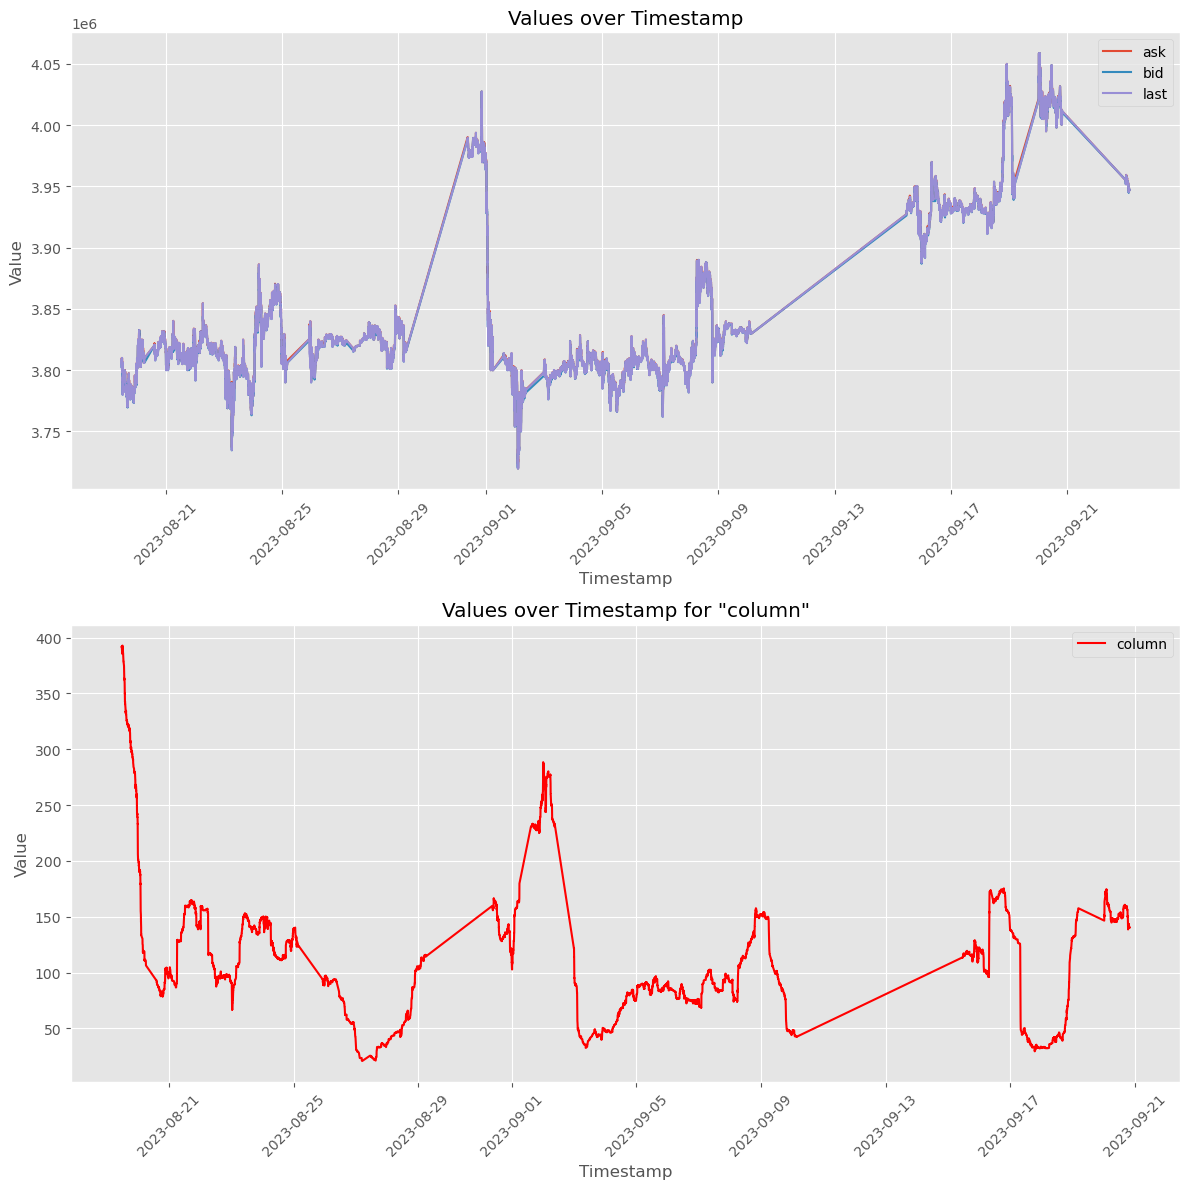

In [6]:
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt

# Set the style
plt.style.use('ggplot')


db_paths = [
    r"C:\Users\yamaguchi\MyDocument\pytest\virtual_currency\gmo\ratest_rate\2023-09-15_ratest_rate.db",
    r"C:\Users\yamaguchi\MyDocument\pytest\virtual_currency\gmo\ratest_rate\2023-09-16_ratest_rate.db",
    r"C:\Users\yamaguchi\MyDocument\pytest\virtual_currency\gmo\ratest_rate\2023-09-17_ratest_rate.db",
    r"C:\Users\yamaguchi\MyDocument\pytest\virtual_currency\gmo\ratest_rate\2023-09-18_ratest_rate.db",
    r"C:\Users\yamaguchi\MyDocument\pytest\virtual_currency\gmo\ratest_rate\2023-09-19_ratest_rate.db",
    r"C:\Users\yamaguchi\MyDocument\pytest\virtual_currency\gmo\ratest_rate\2023-09-20_ratest_rate.db"
]



# ratest_rate全体を見てみる
db_paths = os.listdir(r'C:\Users\yamaguchi\MyDocument\gmo_data\ratest_rate')
db_paths = [os.path.join(r'C:\Users\yamaguchi\MyDocument\gmo_data\ratest_rate', db_path) for db_path in db_paths]

def rate_plot(db_paths):

    df = None

    # db_paths のファイルを一つのdfにまとめる 
    for db_path in db_paths:

        conn = sqlite3.connect(db_path)
        tmp_df = pd.read_sql('SELECT * FROM ratest_rate', conn)

        if df is None:
            df = tmp_df
        else:
            df = pd.concat([df, tmp_df])


    # dfの中の要らない部分を削除，timestamp (str) -> (datetime)
    df = df.drop(['id', 'symbol', 'channel'], axis = 1)
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

    # ここからplot

    # Create a 2x1 grid for the subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

    # First plot
    for column in ['ask', 'bid', 'last']:
        axes[0].plot(df['timestamp'], df[column], label=column)
    axes[0].set_xlabel('Timestamp')
    axes[0].set_ylabel('Value')
    axes[0].set_title('Values over Timestamp')
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=45)

    # Second plot
    axes[1].plot(df['timestamp'], df['column'], label='column', color='red')
    axes[1].set_xlabel('Timestamp')
    axes[1].set_ylabel('Value')
    axes[1].set_title('Values over Timestamp for "column"')
    axes[1].legend()
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

rate_plot(db_paths)

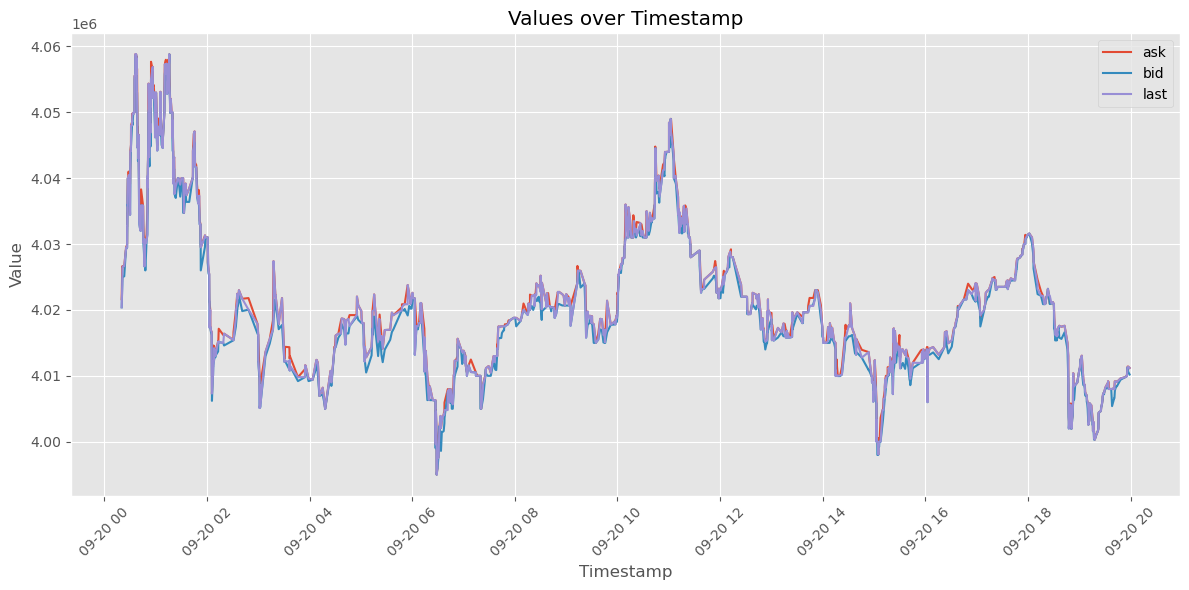

In [7]:
import matplotlib.pyplot as plt

# Set the style and size of the plot
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')

# Plot the columns against timestamp
for column in ['ask', 'bid', 'last']: # highとlowを削除
    plt.plot(df['timestamp'], df[column], label=column)

# Setting labels, title and legend
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Values over Timestamp')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

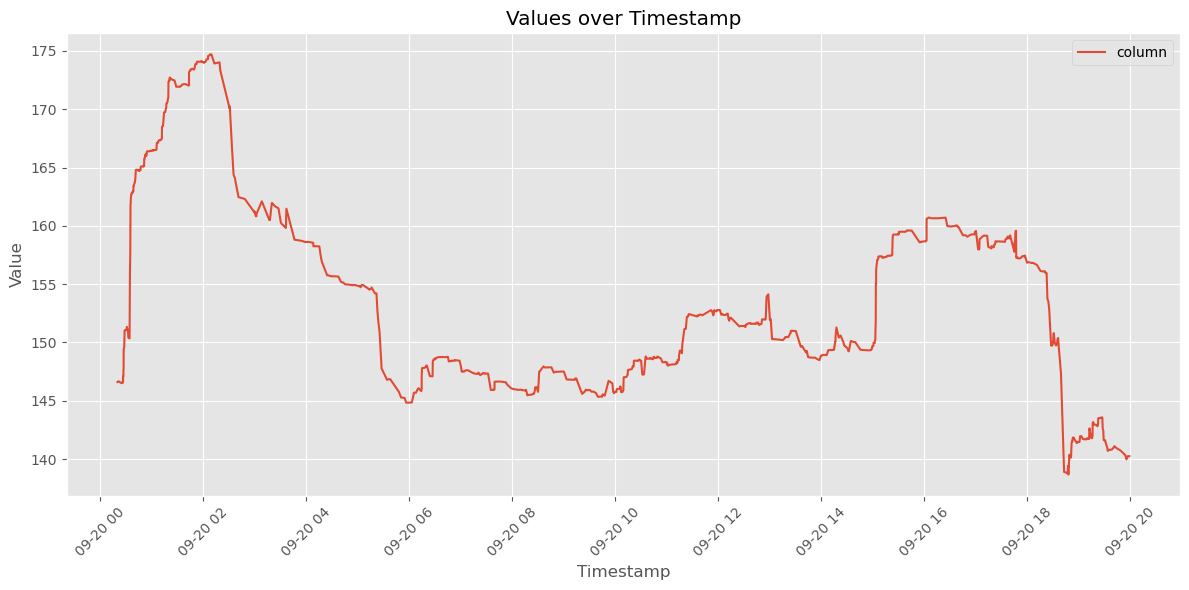

In [8]:
import matplotlib.pyplot as plt

# Set the style and size of the plot
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')

# Plot the columns against timestamp
for column in ['column']: # highとlowを削除
    plt.plot(df['timestamp'], df[column], label=column)

# Setting labels, title and legend
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Values over Timestamp')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

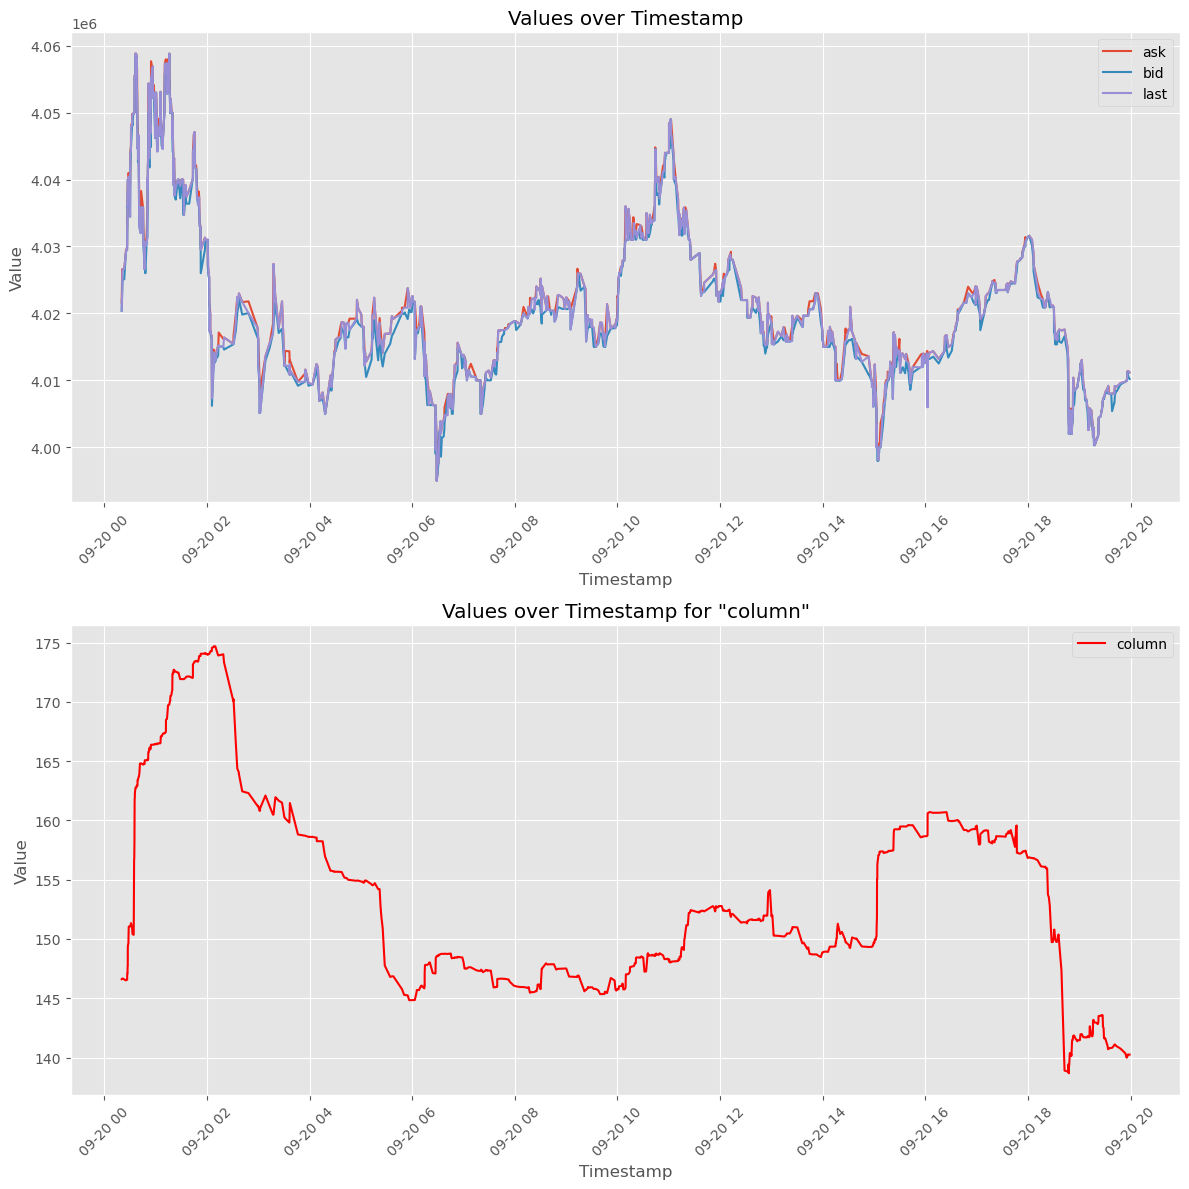

In [9]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('ggplot')

# Create a 2x1 grid for the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# First plot
for column in ['ask', 'bid', 'last']:
    axes[0].plot(df['timestamp'], df[column], label=column)
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Value')
axes[0].set_title('Values over Timestamp')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Second plot
axes[1].plot(df['timestamp'], df['column'], label='column', color='red')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Value')
axes[1].set_title('Values over Timestamp for "column"')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


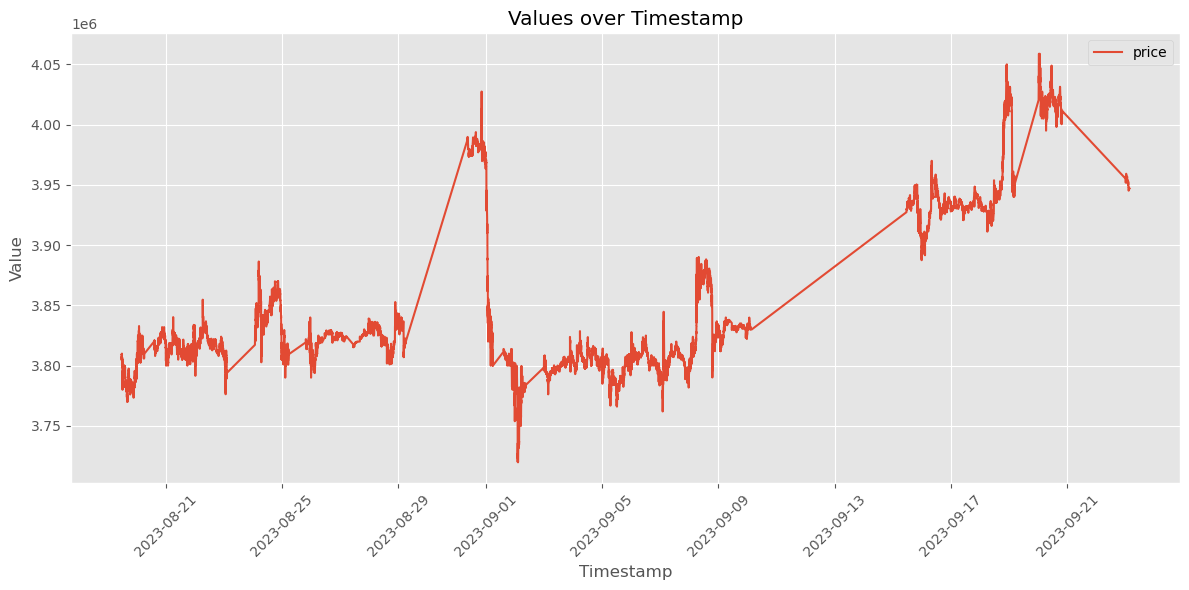

In [10]:
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt

# Set the style
plt.style.use('ggplot')

# ratest_rate全体を見てみる
db_paths = os.listdir(r'C:\Users\yamaguchi\MyDocument\gmo_data\trading_hist')
db_paths = [os.path.join(r'C:\Users\yamaguchi\MyDocument\gmo_data\trading_hist', db_path) for db_path in db_paths]


def trading_plot(db_paths):
    df = None

    # db_paths のファイルを一つのdfにまとめる 
    for db_path in db_paths:

        conn = sqlite3.connect(db_path)
        tmp_df = pd.read_sql('SELECT * FROM trading_history', conn)

        if df is None:
            df = tmp_df
        else:
            df = pd.concat([df, tmp_df])


    # dfの中の要らない部分を削除，timestamp (str) -> (datetime)
    df = df.drop(['id', 'symbol', 'channel'], axis = 1)
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


    ############################# ここからplot

    # Set the style and size of the plot
    plt.figure(figsize=(12, 6))
    plt.style.use('ggplot')

    # Plot the columns against timestamp
    for column in ['price']: # highとlowを削除
        plt.plot(df['timestamp'], df[column], label=column)

    # Setting labels, title and legend
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title('Values over Timestamp')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the plot
    plt.show()

    ##########################

    # # Create a 2x1 grid for the subplots
    # fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

    # # First plot
    # for column in ['price']:  # highとlowを削除
    #     axes[0].plot(df['timestamp'], df[column], label=column)
    # axes[0].set_xlabel('Timestamp')
    # axes[0].set_ylabel('Value')
    # axes[0].set_title('Values over Timestamp')
    # axes[0].legend()
    # axes[0].tick_params(axis='x', rotation=45)

    # # Second plot
    # axes[1].plot(df['timestamp'], df['size'], label='column', color='blue')
    # axes[1].set_xlabel('Timestamp')
    # axes[1].set_ylabel('Column Value')
    # axes[1].set_title('Column Value over Timestamp')
    # axes[1].legend()
    # axes[1].tick_params(axis='x', rotation=45)

    # plt.tight_layout()
    # plt.show()

trading_plot(db_paths)

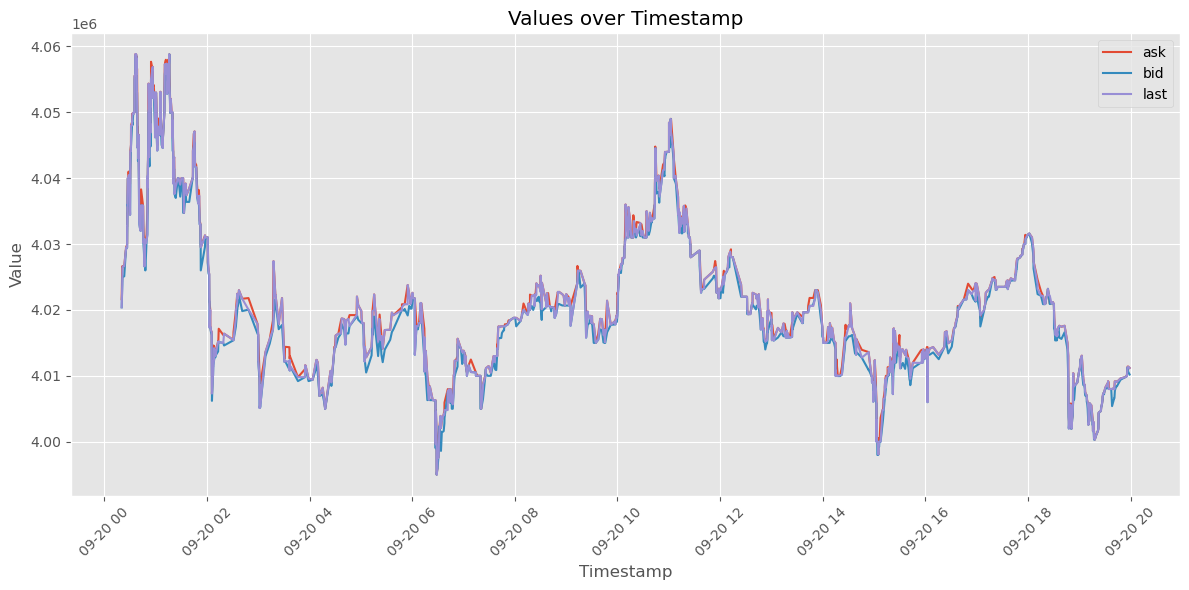

In [11]:
# For each row, check if the time difference with the next row is more than 1 hour
# If it is, set the values in that row to NaN
for idx, row in df[:-1].iterrows():
    next_timestamp = df['timestamp'].iloc[idx + 1]
    if next_timestamp - row['timestamp'] > pd.Timedelta(hours=1):
        df.loc[idx, ['ask', 'bid', 'last']] = None

# Set the style and size of the plot
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')

# Plot the columns against timestamp
for column in ['ask', 'bid', 'last']:
    plt.plot(df['timestamp'], df[column], label=column)

# Setting labels, title and legend
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Values over Timestamp')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


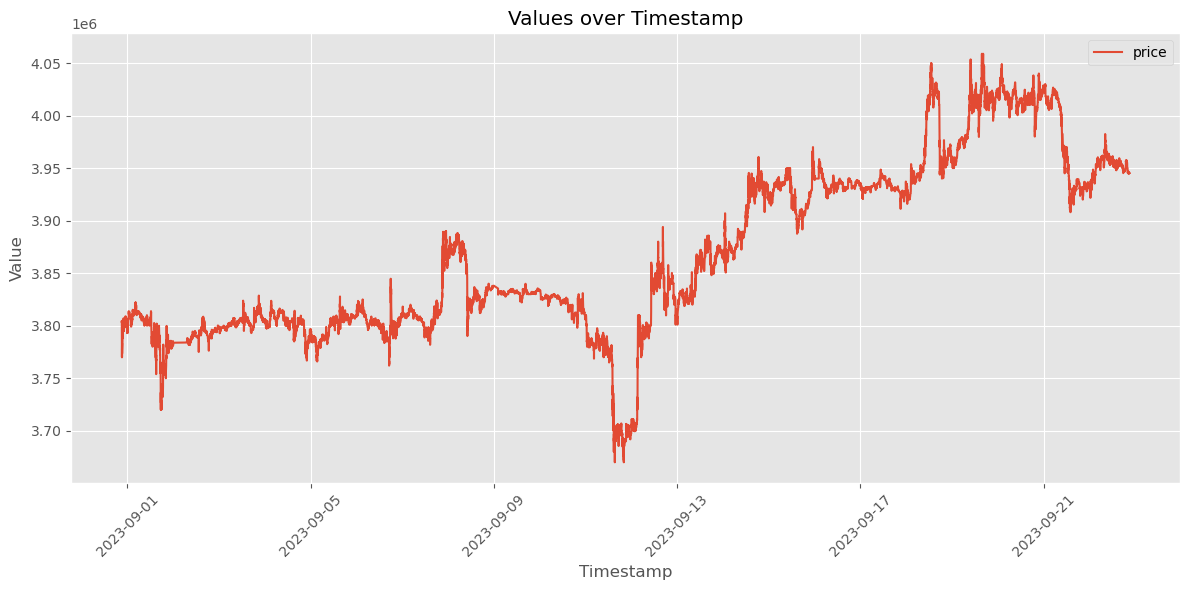

In [12]:
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt

# Set the style
plt.style.use('ggplot')


db_paths = r'C:\Users\yamaguchi\MyDocument\pytest\virtual_currency\gmo\original_gym\myenv\BTC_2023_9.csv'


def hist_trading_plot(db_paths):
    df = None

    # db_paths のファイルを一つのdfにまとめる 
    if type(df) == list:
        for db_path in db_paths:

            # conn = sqlite3.connect(db_path)
            # tmp_df = pd.read_sql('SELECT * FROM trading_history', conn)
            tmp_df = pd.read_csv(db_path)

            if df is None:
                df = tmp_df
            else:
                df = pd.concat([df, tmp_df])
    else:
        df = pd.read_csv(db_paths)


    # dfの中の要らない部分を削除，timestamp (str) -> (datetime)
    df = df.drop(['symbol'], axis = 1)
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


    ############################# ここからplot

    # Set the style and size of the plot
    plt.figure(figsize=(12, 6))
    plt.style.use('ggplot')

    # Plot the columns against timestamp
    for column in ['price']: # highとlowを削除
        plt.plot(df['timestamp'], df[column], label=column)

    # Setting labels, title and legend
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title('Values over Timestamp')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the plot
    plt.show()

    ##########################

    # # Create a 2x1 grid for the subplots
    # fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

    # # First plot
    # for column in ['price']:  # highとlowを削除
    #     axes[0].plot(df['timestamp'], df[column], label=column)
    # axes[0].set_xlabel('Timestamp')
    # axes[0].set_ylabel('Value')
    # axes[0].set_title('Values over Timestamp')
    # axes[0].legend()
    # axes[0].tick_params(axis='x', rotation=45)

    # # Second plot
    # axes[1].plot(df['timestamp'], df['size'], label='column', color='blue')
    # axes[1].set_xlabel('Timestamp')
    # axes[1].set_ylabel('Column Value')
    # axes[1].set_title('Column Value over Timestamp')
    # axes[1].legend()
    # axes[1].tick_params(axis='x', rotation=45)

    # plt.tight_layout()
    # plt.show()

hist_trading_plot(db_paths)

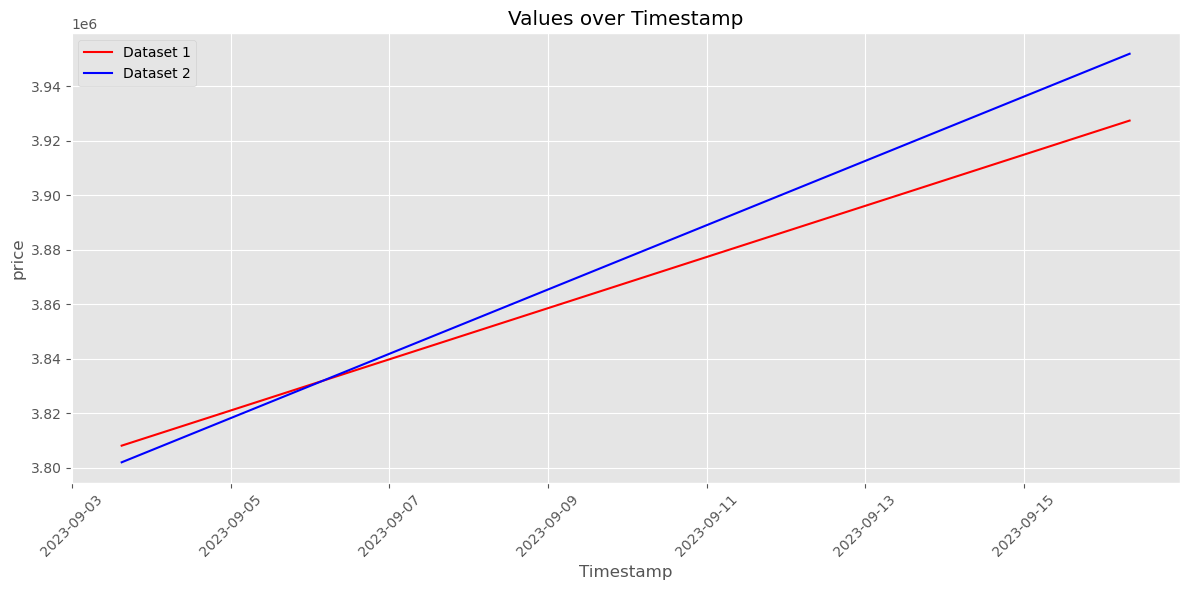

,side_1,size_1,price_1,timestamp,price_2,size_2,side_2,column
0,BUY,0.0001,3808111.0,2023-09-03 15:00:53.742,3801998,0.0001,SELL,BTC
1,SELL,0.0001,3927463.0,2023-09-16 08:00:01.983,3952000,0.0499,SELL,BTC
2,SELL,0.0001,3927463.0,2023-09-16 08:00:01.983,3952000,0.0032,SELL,BTC


In [19]:
def hist_trading_data(db_paths):
    df = None

    # db_paths のファイルを一つのdfにまとめる 
    if type(df) == list:
        for db_path in db_paths:

            # conn = sqlite3.connect(db_path)
            # tmp_df = pd.read_sql('SELECT * FROM trading_history', conn)
            tmp_df = pd.read_csv(db_path)

            if df is None:
                df = tmp_df
            else:
                df = pd.concat([df, tmp_df])
    else:
        df = pd.read_csv(db_paths)


    # dfの中の要らない部分を削除，timestamp (str) -> (datetime)
    df = df.drop(['symbol'], axis = 1)
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

    return df


def trading_data(db_paths):
    df = None

    # db_paths のファイルを一つのdfにまとめる 
    for db_path in db_paths:
        conn = sqlite3.connect(db_path)
        tmp_df = pd.read_sql('SELECT * FROM trading_history', conn)

        if df is None:
            df = tmp_df
        else:
            df = pd.concat([df, tmp_df])


    # dfの中の要らない部分を削除，timestamp (str) -> (datetime)
    df = df.drop(['id', 'symbol', 'channel'], axis = 1)
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

    return df


def overlay_plot(df1, df2):
    plt.figure(figsize=(12, 6))
    
    # Merge two dataframes on 'timestamp'
    merged_df = pd.merge(df1, df2, on='timestamp', how='inner', suffixes=('_1', '_2'))
    
    plt.plot(merged_df['timestamp'], merged_df['price_1'], label='Dataset 1', color='red')
    plt.plot(merged_df['timestamp'], merged_df['price_2'], label='Dataset 2', color='blue')

    plt.xlabel('Timestamp')
    plt.ylabel('price')
    plt.title('Values over Timestamp')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return merged_df
    
db_paths = os.listdir(r'C:\Users\yamaguchi\MyDocument\gmo_data\trading_hist')
trading_db_paths = [os.path.join(r'C:\Users\yamaguchi\MyDocument\gmo_data\trading_hist', db_path) for db_path in db_paths]

# 使用例
df1 = hist_trading_data(r"C:\Users\yamaguchi\MyDocument\pytest\virtual_currency\gmo\original_gym\myenv\BTC_2023_9.csv")
df2 = trading_data(trading_db_paths)
overlay_plot(df1, df2)


In [17]:
df1.head()

,side,size,price,timestamp
0,BUY,0.0100,3803798.0,2023-08-31 21:00:35.527
1,BUY,0.0068,3803798.0,2023-08-31 21:00:35.527
2,BUY,0.0100,3803999.0,2023-08-31 21:00:35.527
3,BUY,0.0005,3804000.0,2023-08-31 21:00:35.527
4,BUY,0.0027,3804000.0,2023-08-31 21:00:35.527


In [18]:
df2.head()

,timestamp,price,size,side,column
0,2023-08-19 11:40:11.599,3809378,0.0010,BUY,BTC
1,2023-08-19 11:40:39.194,3809389,0.0005,BUY,BTC
2,2023-08-19 11:40:57.781,3809389,0.0001,BUY,BTC
3,2023-08-19 11:42:19.169,3808527,0.0082,SELL,BTC
4,2023-08-19 11:42:46.174,3808519,0.0003,BUY,BTC


# 学習時のデータを可視化

In [23]:
import json

# Load the uploaded JSON file
with open(r'C:\Users\yamaguchi\MyDocument\pytest\virtual_currency\gmo\original_gym\myenv\experiences.json', 'r') as json_file:
    experiences_data = json.load(json_file)

# Check the type and structure of the loaded data
type(experiences_data), experiences_data[0]  # Displaying the first entry as a sample


(list,
 {'state': [4003800.0,
   4003650.0,
   4003800.0,
   141.5021,
   67792682.08302853,
   -16.797061866802498],
  'action': [-0.008830502038790301],
  'reward': -13444.713895082474,
  'n_state': [4004600.0,
   4003916.0,
   4004600.0,
   141.4991,
   67828037.64709143,
   -16.80589236884129],
  'done': False})

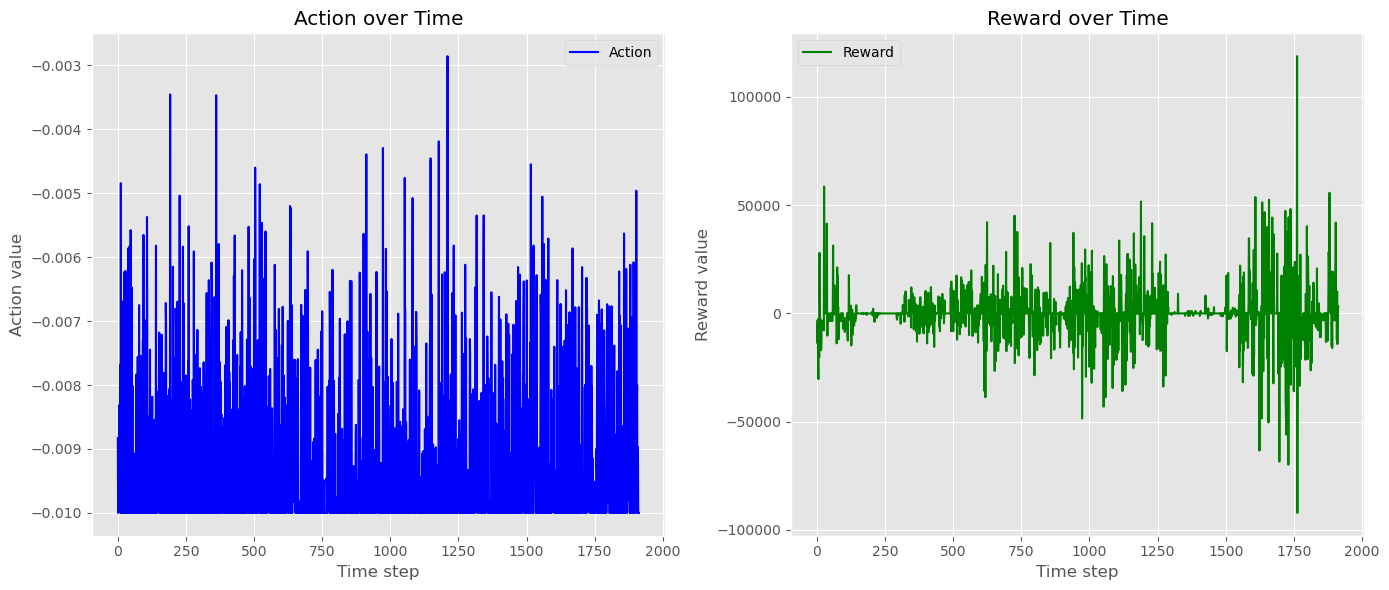

In [25]:
# Extract action and reward data from the experiences data
actions = [item['action'][0] for item in experiences_data[:1914]]  # Assuming action is always a list with a single value
rewards = [item['reward'] for item in experiences_data[:1914]]

# Plot the action and reward data
plt.figure(figsize=(14, 6))

# Plotting action values
plt.subplot(1, 2, 1)
plt.plot(actions, label='Action', color='blue')
plt.title('Action over Time')
plt.xlabel('Time step')
plt.ylabel('Action value')
plt.legend()

# Plotting reward values
plt.subplot(1, 2, 2)
plt.plot(rewards, label='Reward', color='green')
plt.title('Reward over Time')
plt.xlabel('Time step')
plt.ylabel('Reward value')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
deque([{'state': array([ 4.00380000e+06,  4.00365000e+06,  4.00380000e+06,  1.41502100e+02, 6.77926821e+07, -1.67970619e+01]),
        'action': array([-0.0088305]),
        'reward': -13444.713895082474,
        'n_state': array([ 4.00460000e+06,  4.00391600e+06,  4.00460000e+06,  1.41499100e+02, 6.78280376e+07, -1.68058924e+01]),
        'done': False},
       {'state': array([ 4.00460000e+06,  4.00391600e+06,  4.00460000e+06,  1.41499100e+02, 6.78280376e+07, -1.68058924e+01]),
        'action': array([-0.01]),
        'reward': -3363.1784737706184,
        'n_state': array([ 4.00480000e+06,  4.00479900e+06,  4.00480000e+06,  1.41500100e+02, 6.78680836e+07, -1.68158924e+01]),
        'done': False},
       {'state': array([ 4.00480000e+06,  4.00479900e+06,  4.00480000e+06,  1.41500100e+02, 6.78680836e+07, -1.68158924e+01]),
        'action': array([-0.01]),
        'reward': -3365.1784737706184,
        'n_state': array([ 4.00500000e+06,  4.00499900e+06,  4.00500000e+06,  1.41599100e+02, 6.79081316e+07, -1.68258924e+01]),
        'done': False},
       {'state': array([ 4.00500000e+06,  4.00499900e+06,  4.00500000e+06,  1.41599100e+02, 6.79081316e+07, -1.68258924e+01]),
        'action': array([-0.00955706]),
        'reward': -3367.089886173606,
        'n_state': array([ 4.00520000e+06,  4.00519900e+06,  4.00520000e+06,  1.41619100e+02, 6.79464077e+07, -1.68354494e+01]),
        'done': False},
       {'state': array([ 4.00520000e+06,  4.00519900e+06,  4.00520000e+06,  1.41619100e+02, 6.79464077e+07, -1.68354494e+01]),
        'action': array([-0.0091105]),
        'reward': -23582.383897587657,
        'n_state': array([ 4.00840000e+06,  4.00555500e+06,  4.00660000e+06,  1.41719100e+02, 6.79828970e+07, -1.68445599e+01]),
        'done': False},
       {'state': array([ 4.00840000e+06,  4.00555500e+06,  4.00660000e+06,  1.41719100e+02, 6.79828970e+07, -1.68445599e+01]),
        'action': array([-0.00831512]),
        'reward': -30335.17508418858,
        'n_state': array([ 4.00852800e+06,  4.00595000e+06,  4.00840000e+06,  1.41819100e+02, 6.80162124e+07, -1.68528750e+01]),
        'done': False},
        {'state': array([ 4.01500100e+06,  4.01500000e+06,  4.01500100e+06,  1.45788600e+02, 3.16623494e+07, -7.80885767e+00]),
        'action': array([-0.00878784]),
        'reward': -3901.0051112622023,
        'n_state': array([ 4.01640000e+06,  4.01550000e+06,  4.01550000e+06,  1.45669600e+02, 3.16976326e+07, -7.81764551e+00]),
        'done': False},
       {'state': array([ 4.01640000e+06,  4.01550000e+06,  4.01550000e+06,  1.45669600e+02, 3.16976326e+07, -7.81764551e+00]),
        'action': array([-0.01]),
        'reward': -24641.428076669574,
        'n_state': array([ 4.01864800e+06,  4.01705100e+06,  4.01864800e+06,  1.45349600e+02, 3.17377876e+07, -7.82764551e+00]),
        'done': False},
       ...],
      maxlen=10000)